In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("car_ownership.csv")
df.head()

,monthly_salary,owns_car
0,22000,0
1,25000,0
2,47000,1
3,52000,0
4,46000,1


In [3]:
df.shape

(27, 2)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
model = LogisticRegression()

In [6]:
X = df[['monthly_salary']]
y = df['owns_car']

In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [8]:
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
model.score(X_test, y_test)

0.8888888888888888

In [10]:
y_preds = model.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 0, 0, 1, 0])

In [11]:
model.predict_proba(X_test)

array([[0.04530932, 0.95469068],
       [0.80955349, 0.19044651],
       [0.05158003, 0.94841997],
       [0.86480041, 0.13519959],
       [0.91687254, 0.08312746],
       [0.82967465, 0.17032535],
       [0.87995016, 0.12004984],
       [0.07564619, 0.92435381],
       [0.84806892, 0.15193108]])

In [12]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[5, 0],
       [1, 3]])

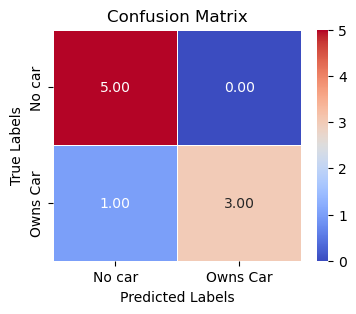

In [14]:
# Plot heatmap
plt.figure(figsize=(4,3))
classes = ['No car', 'Owns Car']
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title("Confusion Matrix")
plt.show()